In [56]:
import torch
import torchvision
from torchvision import transforms

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Detection

In [57]:
#Load the pretrained fasterRCNN model
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [58]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [59]:
#Predict object detection of an image
img=Image.open("/home/aya/Desktop/Kitti-ObjectDetection/FasterRCNN/KittiVOC/JPEGImages/000225.jpg")

In [60]:
#convert the PIL image to a tensor
ConvertTensor=transforms.ToTensor()
img=ConvertTensor(img)

In [61]:
#pass the image to the model
with torch.no_grad(): #not to use the gradient function of pytorch (grad will not be calculated)
    pred=model([img],)

In [62]:
pred
#pred is a list that contains a dictionary of three values "bboxes", "labels" and the "score"
#each bounding box has four coordinates: x1 left, y1 top, x2 right, y2 bottom pixel coordinates
#bbox: [427.3838, 180.3451, 446.7622, 192.5467]
#(x1,y1): top left (427.3838, 180.3451)
#(x2,y2): bottom right (446.7622, 192.5467)

[{'boxes': tensor([[427.3838, 180.3451, 446.7622, 192.5467],
          [557.5916, 178.1148, 581.9435, 195.3900],
          [  0.9751, 177.2428, 121.8341, 228.8603],
          [581.9089, 179.1110, 621.2071, 213.8742],
          [379.2358, 181.1431, 405.5375, 197.3732],
          [449.0947, 134.1944, 457.2250, 149.8722],
          [495.4193, 145.3986, 557.3671, 212.6367],
          [577.2128, 179.0028, 591.3078, 194.1251],
          [438.3131, 181.1795, 453.3044, 191.2549],
          [  0.0000, 177.9470, 120.5919, 229.1413],
          [493.5721, 150.4613, 556.4861, 213.4297],
          [565.4861, 177.3818, 588.8069, 194.6393],
          [581.2444, 178.1466, 621.4941, 213.2514],
          [713.8751, 166.8592, 744.7589, 180.7428],
          [451.5392, 152.5400, 461.8482, 162.3767],
          [611.4619, 181.7200, 623.2296, 195.0253],
          [560.1860, 147.1754, 616.4638, 185.5822],
          [561.0617,  77.0201, 587.0129,  82.8292],
          [443.8232, 179.0226, 454.5392, 190.1624],
   

In [63]:
#number of detected objects
print("number of total bounding boxes", len(pred[0]['boxes']))

number of total bounding boxes 22


In [64]:
COCO_INSTANCE_CATEGORY_NAMES = {0: u'__background__', 1: u'person', 2: u'bicycle',3: u'car', 4: u'motorcycle', 5: u'airplane', 6: u'bus', 7: u'train', 8: u'truck', 9: u'boat', 10: u'traffic light', 11: u'fire hydrant', 12: u'stop sign', 13: u'parking meter', 14: u'bench', 15: u'bird', 16: u'cat', 17: u'dog', 18: u'horse', 19: u'sheep', 20: u'cow', 21: u'elephant', 22: u'bear', 23: u'zebra', 24: u'giraffe', 25: u'backpack', 26: u'umbrella', 27: u'handbag', 28: u'tie', 29: u'suitcase', 30: u'frisbee', 31: u'skis', 32: u'snowboard', 33: u'sports ball', 34: u'kite', 35: u'baseball bat', 36: u'baseball glove', 37: u'skateboard', 38: u'surfboard', 39: u'tennis racket', 40: u'bottle', 41: u'wine glass', 42: u'cup', 43: u'fork', 44: u'knife', 45: u'spoon', 46: u'bowl', 47: u'banana', 48: u'apple', 49: u'sandwich', 50: u'orange', 51: u'broccoli', 52: u'carrot', 53: u'hot dog', 54: u'pizza', 55: u'donut', 56: u'cake', 57: u'chair', 58: u'couch', 59: u'potted plant', 60: u'bed', 61: u'dining table', 62: u'toilet', 63: u'tv', 64: u'laptop', 65: u'mouse', 66: u'remote', 67: u'keyboard', 68: u'cell phone', 69: u'microwave', 70: u'oven', 71: u'toaster', 72: u'sink', 73: u'refrigerator', 74: u'book', 75: u'clock', 76: u'vase', 77: u'scissors', 78: u'teddy bear', 79: u'hair drier', 80: u'toothbrush'}

In [65]:
#seperate the 3 keys (boxes, labels, scores)
bboxes, labels, scores= pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [66]:
def DrawBbox(image,th,txt_color=(255, 255, 255)):

  #define a threshold score

  score=torch.argwhere(scores>=th)
  print("number of objects with {} confidence: {}".format(th, score.shape[0]))

  colors = [(89, 161, 197),(67, 161, 255),(19, 222, 24),(186, 55, 2),(167, 146, 11),(190, 76, 98),(130, 172, 179),(115, 209, 128),(204, 79, 135),(136, 126, 185),(209, 213, 45),(44, 52, 10),(101, 158, 121),(179, 124, 12),(25, 33, 189),(45, 115, 11),(73, 197, 184),(62, 225, 221),(32, 46, 52),(20, 165, 16),(54, 15, 57),(12, 150, 9),(10, 46, 99),(94, 89, 46),(48, 37, 106),(42, 10, 96),(7, 164, 128),(98, 213, 120),(40, 5, 219),(54, 25, 150),(251, 74, 172),(0, 236, 196),(21, 104, 190),(226, 74, 232),(120, 67, 25),(191, 106, 197),(8, 15, 134),(21, 2, 1),(142, 63, 109),(133, 148, 146),(187, 77, 253),(155, 22, 122),(218, 130, 77),(164, 102, 79),(43, 152, 125),(185, 124, 151),(95, 159, 238),(128, 89, 85),(228, 6, 60),(6, 41, 210),(11, 1, 133),(30, 96, 58),(230, 136, 109),(126, 45, 174),(164, 63, 165),(32, 111, 29),(232, 40, 70),(55, 31, 198),(148, 211, 129),(10, 186, 211),(181, 201, 94),(55, 35, 92),(129, 140, 233),(70, 250, 116),(61, 209, 152),(216, 21, 138),(100, 0, 176),(3, 42, 70),(151, 13, 44),(216, 102, 88),(125, 216, 93),(171, 236, 47),(253, 127, 103),(205, 137, 244),(193, 137, 224),(36, 152, 214),(17, 50, 238),(154, 165, 67),(114, 129, 60),(119, 24, 48),(73, 8, 110)]
  for i in range(bboxes.shape[0]):
    if scores.numpy()[i-1]>=th:
      x1, y1, x2, y2= bboxes[i-1].numpy().astype("int") #convert the list to a numpy array of ints 
      #label+score
      class_name=COCO_INSTANCE_CATEGORY_NAMES[labels.numpy()[i-1]]+ str(round(scores.numpy()[i-1]*100))+"%" #i-1 because lists indexes start by zero

      
      lw = max(round(sum(image.shape) / 2 * 0.003), 2)# costumize thickness
      #print the bbox on the image
      img=cv2.rectangle(image, (x1,y1), (x2,y2), colors[i], thickness=lw)


      tf = max(lw - 1, 1)  # font thickness
      w, h = cv2.getTextSize(class_name, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
      outside = y1 - h >= 3
      p2 = (x1 + w, y1 - h - 3 if outside else y1 + h + 3)
      
      #print the labels next to the bbox
      img=cv2.rectangle(image, (x1,y1), p2, colors[i], -1, cv2.LINE_AA)
      img=cv2.putText(image,class_name,(x1, y1- 2 if outside else y1 + h + 2), 0, lw / 3 ,txt_color, 2, cv2.LINE_AA)

  plt.figure(figsize=(15,15))
  plt.axis("off")

  return plt.imshow(img)

number of objects with 0.6 confidence: 7


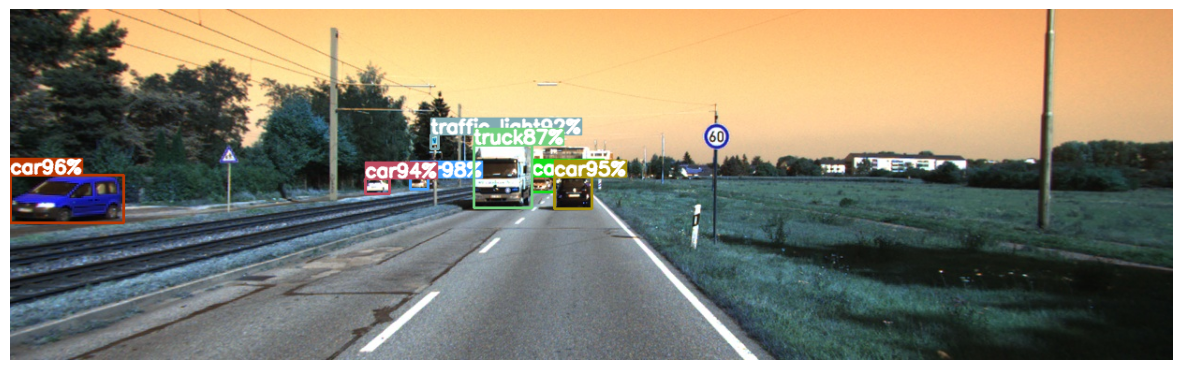

In [67]:
#read the image in cv2
im=cv2.imread("/home/aya/Desktop/Kitti-ObjectDetection/FasterRCNN/KittiVOC/JPEGImages/000225.jpg")
#Draw bboxes
DrawBbox(im,0.6)